In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize

In [11]:
from typing import Tuple

# Exercice

Ecrire la résolution numérique du programme de maximisation de l'utilité sous- contrainte de revenu.

In [16]:
def calcule_conso(
    a: float, 
    b: float,
    d: float,
    R: float,
    p1: float,
    p2: float
) -> Tuple[float, float, float]:
    if a <= 0 or b <= 0:
        raise ValueError("a et b doivent être strictement positifs!")
    if abs(d) >= b or d == 0:
        raise ValueError("On doit avoir 0 < |d| < b")
    if p1 <=0 or p2 <= 0 or R <= 0:
        raise ValueError("p1, p2 et R doivent être positifs.")
    
    def a_minimiser(x):
        q0, q1, q2 = x
        return (
            (b * q1 ** 2 + 2 * d * q1 * q2 + b * q2 ** 2) / 2 
            - a * q1 - a * q2 - q0
        )
    def contrainte(x):
        q0, q1, q2 = x
        return R - q0 - p1 * q1 - p2 * q2
    
    resultat = minimize(
        fun=a_minimiser,
        x0=np.array([0, 0, 0]),
        bounds=[(0, None), (0, None), (0, None)],
        constraints={"type": "ineq", "fun": contrainte}
    )
    if resultat.success:
        return resultat.x
    else:
        raise ValueError("Impossible de faire converger le solveur.")
    

In [17]:
calcule_conso(a=1, b=1, d=1, p1=1, p2=1, R=1)

ValueError: On doit avoir 0 < |d| < b

In [18]:
calcule_conso(a=1, b=2, d=1, p1=1, p2=1, R=5)

array([4.99999999e+00, 8.14586189e-09, 6.93889390e-18])

# Exercice

Comparer les résultats pour $x_0$ parcourant les 4 sommets du tétraèdre de contrainte.

In [41]:
def calcule_conso_v2(
    a: float, 
    b: float,
    d: float,
    R: float,
    p1: float,
    p2: float
) -> Tuple[float, float, float]:
    if a <= 0 or b <= 0:
        raise ValueError("a et b doivent être strictement positifs!")
    if abs(d) >= b or d == 0:
        raise ValueError("On doit avoir 0 < |d| < b")
    if p1 <=0 or p2 <= 0 or R <= 0:
        raise ValueError("p1, p2 et R doivent être positifs.")
    
    def a_minimiser(x):
        q0, q1, q2 = x
        return (
            (b * q1 ** 2 + 2 * d * q1 * q2 + b * q2 ** 2) / 2 
            - a * q1 - a * q2 - q0
        )
    def contrainte(x):
        q0, q1, q2 = x
        return R - q0 - p1 * q1 - p2 * q2
    
    resultats = list()
    maximiseur, maximum = None, -float("inf")
    for xt in [(0,0,0), (R, 0, 0), (0, R / p1, 0), (0,0, R / p2)]:
        resultat = minimize(
                fun=a_minimiser,
                x0=np.array(xt),
                bounds=[(0, None), (0, None), (0, None)],
                constraints={"type": "ineq", "fun": contrainte}
        )
        if resultat.success:
            if -a_minimiser(resultat.x) > maximum:
                maximiseur = resultat.x
            
    if maximiseur is not None:
        return maximiseur
    else:
        raise ValueError("impossible de faire converger le solveur.")

In [42]:
calcule_conso_v2(a=1, b=2, d=1, p1=1, p2=1, R=5)

array([4.99989955e+00, 4.21317815e-16, 1.00452141e-04])

# Exercice

Faites des combinaisons convexes aléatoires des 4 sommets pour initialiser le solveur et vérifier si le maximiseur précédente est inchangé.

# Exercice

Pour visualiser les $\tilde{q}_i(p1, p2)$ on utilisera `imshow`.

On va ici faire un exemple avec la fonction $(x, y) \mapsto e^{-\frac{x^2+y^2}{2}} \cos{ xy}$

In [21]:
xs, ys = np.linspace(-np.pi, np.pi, 5), np.linspace(-np.pi, np.pi, 5) 
X, Y = np.meshgrid(xs, ys)


In [22]:
X

array([[-3.14159265, -1.57079633,  0.        ,  1.57079633,  3.14159265],
       [-3.14159265, -1.57079633,  0.        ,  1.57079633,  3.14159265],
       [-3.14159265, -1.57079633,  0.        ,  1.57079633,  3.14159265],
       [-3.14159265, -1.57079633,  0.        ,  1.57079633,  3.14159265],
       [-3.14159265, -1.57079633,  0.        ,  1.57079633,  3.14159265]])

In [23]:
Y

array([[-3.14159265, -3.14159265, -3.14159265, -3.14159265, -3.14159265],
       [-1.57079633, -1.57079633, -1.57079633, -1.57079633, -1.57079633],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 1.57079633,  1.57079633,  1.57079633,  1.57079633,  1.57079633],
       [ 3.14159265,  3.14159265,  3.14159265,  3.14159265,  3.14159265]])

In [24]:
Z = np.exp(-(X ** 2 + Y ** 2) / 2) * np.cos(X * Y)

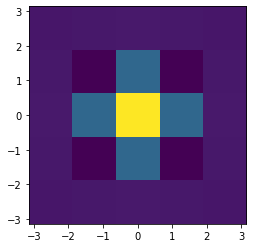

In [25]:
plt.imshow(Z, extent=(-np.pi, np.pi, -np.pi, np.pi))

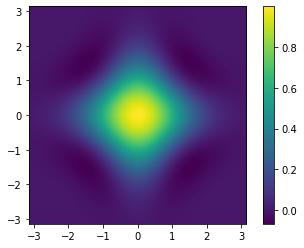

In [27]:
nb_points = 100
xs  = np.linspace(-np.pi, np.pi, nb_points)
ys = np.linspace(-np.pi, np.pi, nb_points) 
X, Y = np.meshgrid(xs, ys)
Z = np.exp(-(X ** 2 + Y ** 2) / 2) * np.cos(X * Y)
plt.imshow(Z, extent=(-np.pi, np.pi, -np.pi, np.pi))
plt.colorbar()

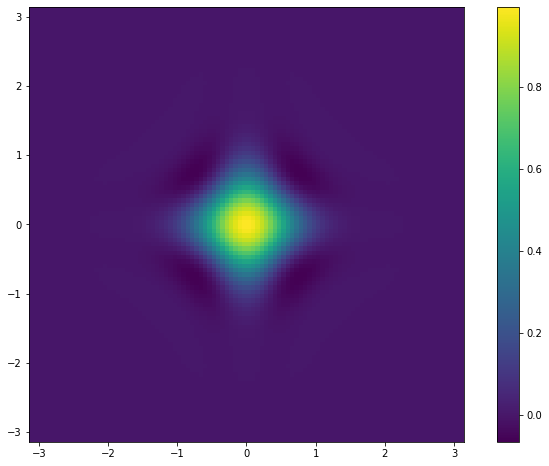

In [32]:
nb_points = 100
xs  = np.linspace(-np.pi, np.pi, nb_points)
ys = np.linspace(-np.pi, np.pi, nb_points)[::-1] 
X, Y = np.meshgrid(xs, ys)
Z = np.exp(-(X ** 2 + Y ** 2) / 2) * np.cos(X * Y)
fig, rep = plt.subplots(figsize=(12, 8))

im = rep.imshow(Z, extent=(-np.pi, np.pi, -np.pi, np.pi))
fig.colorbar(im)

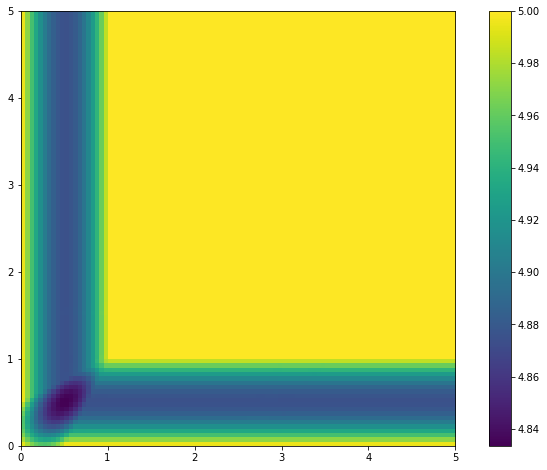

In [43]:
nb_points = 100
p1s  = np.linspace(0.01, 5, nb_points)
p2s = np.linspace(0.01, 5, nb_points)[::-1] 
Q0 = list()
for p2 in p2s:
    ligne = list()
    for p1 in p1s:
        q0, q1, q2 = calcule_conso_v2(a=1, b=2, d=1, p1=p1, p2=p2, R= 5)
        ligne.append(q0)
    Q0.append(ligne)
fig, rep = plt.subplots(figsize=(12, 8))

im = rep.imshow(Q0, extent=(0, 5, 0, 5))
fig.colorbar(im)

# Ensemble de niveaux de u

In [44]:
a, b, d, p1, p2, R = 2, 2, 1, 0.9, 0.95, 10

q0s, q1s, q2s = (
    np.linspace(0, R, 30), 
    np.linspace(0, R/p1, 30), 
    np.linspace(0, R/p2, 30),
)
Q0, Q1, Q2 = np.meshgrid(q0s, q1s, q2s)

U = a * (Q1 + Q2) + Q0 - b * (Q1 ** 2 + Q2 ** 2) / 2 - d * Q1 * Q2



In [45]:
U.shape

(30, 30, 30)

In [46]:
import plotly.graph_objects as go

In [53]:
fig = go.Figure(
    data=go.Isosurface(
        x=Q1.flatten(),
        y=Q2.flatten(),
        z=Q0.flatten(),
        value=U.flatten(),
        surface_count=5,
        isomin=0,
        isomax=0.95 * np.max(U),
        caps={"x_show": False, "y_show": False, "z_show": False}
    ),
    layout={
        "width": 800,
        "height": 600,
    }
)
        

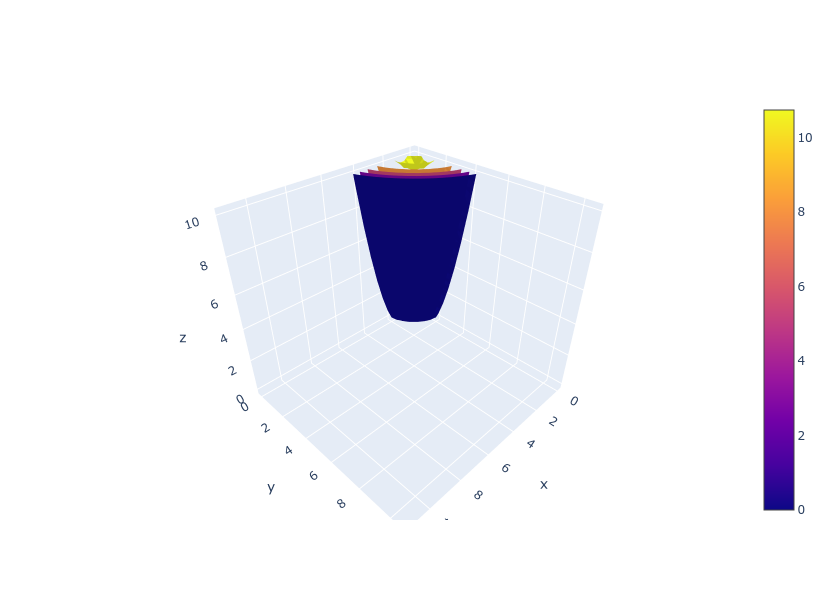

In [54]:
fig

# Exercice

Rajouter la surface
$$q_0 + p_1 q_1 + p_2 q_2 = R.$$